In [8]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_csv("Salary_Data.csv")  
df.head(5)


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
print(df.isnull().sum()) 



YearsExperience    0
Salary             0
dtype: int64


In [5]:
print(df.dtypes)  


YearsExperience    float64
Salary             float64
dtype: object


In [6]:
print(df.describe())  


       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


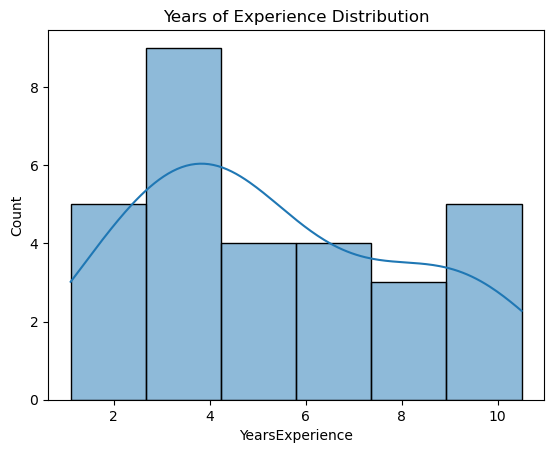

In [8]:
#Exploratory Data Analysis

import matplotlib.pyplot as plt  
import seaborn as sns  

sns.histplot(df['YearsExperience'], kde=True)  
plt.title("Years of Experience Distribution")  
plt.show()


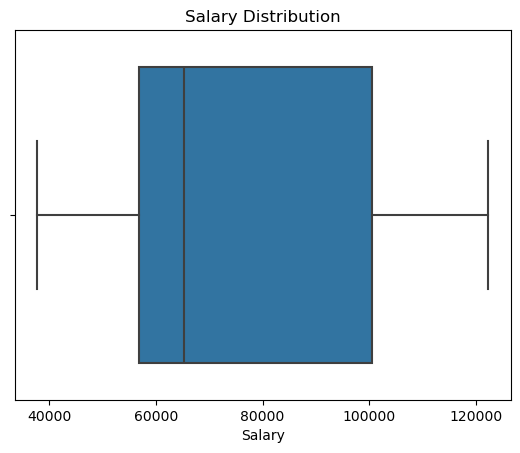

In [9]:
sns.boxplot(x=df['Salary'])  
plt.title("Salary Distribution")  
plt.show()


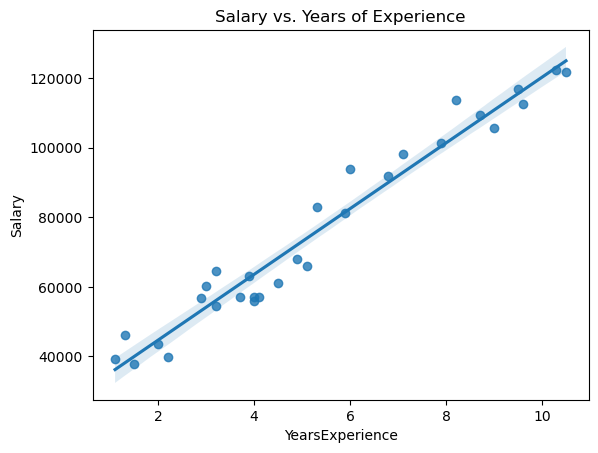

In [10]:
sns.regplot(x=df["YearsExperience"], y=df["Salary"])  
plt.title("Salary vs. Years of Experience")  
plt.show()


In [29]:
#Model Building (Simple Linear Regression)
#Split Data into Training (80%) and Testing (20%)

from sklearn.model_selection import train_test_split  

X = df[['YearsExperience']]  
y = df['Salary'] 




In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:

from sklearn.linear_model import LinearRegression  

model = LinearRegression()  
model.fit(X_train, y_train) 
m = model.coef_[0]   
c = model.intercept_

print(f"Equation: Salary = {round(m, 2)} * YearsExperience + {round(c, 2)}")


Equation: Salary = 9423.82 * YearsExperience + 25321.58


In [33]:
y_pred = model.predict(X_test) 
print(y_pred[:5])

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  

mae = mean_absolute_error(y_test, y_pred)  
mse = mean_squared_error(y_test, y_pred)  
rmse = mse ** 0.5  
r2 = r2_score(y_test, y_pred)  

print(f"MAE: ${round(mae, 2)}")  
print(f"MSE: {round(mse, 2)}")  
print(f"RMSE: ${round(rmse, 2)}")  
print(f"R² Score: {round(r2, 3)}")


[115790.21011287  71498.27809463 102596.86866063  75267.80422384
  55477.79204548]
MAE: $6286.45
MSE: 49830096.86
RMSE: $7059.04
R² Score: 0.902


In [34]:
# Business Impact
# For HR Teams:
#  Helps in salary planning & benchmarking.

# For Employees:
#  Helps in career planning & salary negotiations.

# For Companies:
# Enables data-driven decision-making on salaries.